<a href="https://colab.research.google.com/github/Prasanthsai0987/Quantum-Machine-Learning-Tasks-/blob/main/QML%20%20(Task%20-%206)%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

============================================================
TASK 6: SHOR CODE – QUANTUM ERROR CORRECTION SIMULATION
============================================================

AIM:
-----
To implement and simulate Shor’s 9-qubit Quantum Error Correction (QEC)
code using Qiskit, analyze the effect of noise on quantum computations,
and demonstrate how Shor’s code protects quantum information from
bit-flip (X) and phase-flip (Z) errors.

------------------------------------------------------------
ALGORITHM:
------------------------------------------------------------

Step 1: Define the Shor encoding circuit (shor_encode):
        - Apply bit-flip and phase-flip encoding on 9 qubits.

Step 2: Define a general quantum operations circuit:
        - Include gates H, Rx, Ry, Rz, S, T, CX, CZ, SWAP.

Step 3: Create a simplified error correction function:
        - Apply placeholders for X and Z corrections.

Step 4: Combine the encoding, operations, and correction
        into a full circuit (shor_qec_circuit).
        - Encode → Apply operations → Error correction → Decode → Measure.

Step 5: Define a depolarizing noise model:
        - p1 = 0.01 (1-qubit gates)
        - p2 = 0.03 (2-qubit gates)
        - Add to all relevant gates in the noise model.

Step 6: Run two simulations:
        a) Without error correction (single-qubit version)
        b) With full Shor QEC circuit
        Compare output statistics.

Step 7: Inject a specific error (e.g., X on qubit 4)
        to demonstrate the correction process.

Step 8: Visualize and analyze:
        - Display circuit diagrams.
        - Plot histograms of results (counts vs output bit).


------------------------------------------------------------
MATHEMATICAL MODEL:
------------------------------------------------------------

1. Shor Code Structure:
------------------------
Shor’s code encodes one logical qubit |ψ⟩ = α|0⟩ + β|1⟩ into nine physical qubits.

Encoding steps:

|ψ⟩ → (α|0⟩ + β|1⟩)
       ↓ Bit-flip encoding (repetition)
       α|000⟩ + β|111⟩
       ↓ Phase-flip encoding (Hadamard + repetition)
       α(|+++⟩ + |−−−⟩) + β(|−−−⟩ + |+++⟩)

Final encoded logical qubit:
|ψ_L⟩ = α|0_L⟩ + β|1_L⟩

where,
|0_L⟩ = (|000⟩ + |111⟩)⊗(|000⟩ + |111⟩)⊗(|000⟩ + |111⟩) / 2√2  
|1_L⟩ = (|000⟩ − |111⟩)⊗(|000⟩ − |111⟩)⊗(|000⟩ − |111⟩) / 2√2

------------------------------------------------------------
2. Error Model:
------------------------
Depolarizing channel applied to 1- and 2-qubit gates.

Single-qubit depolarizing error:
   ρ → (1 − p₁)ρ + (p₁ / 3)(XρX + YρY + ZρZ)

Two-qubit depolarizing error:
   ρ → (1 − p₂)ρ + (p₂ / 15)Σ (EρE†)  where E ∈ {I, X, Y, Z}⊗{I, X, Y, Z}

Parameters used:
   p₁ = 0.01   (1-qubit gate error rate)
   p₂ = 0.03   (2-qubit gate error rate)

------------------------------------------------------------
3. Error Correction Principle:
------------------------
- Bit-flip error (X): Corrected by majority voting on triplets.
- Phase-flip error (Z): Corrected after Hadamard transformation.
- Combined correction ensures robustness against both X and Z errors.

------------------------------------------------------------
4. Quantum Circuits:
------------------------
(a) Shor Encoding Circuit:
    - Step 1: Bit-flip encoding using CNOTs (q0 → q3, q6)
    - Step 2: Phase-flip encoding using Hadamards and additional CNOTs
    - Total 9 qubits

(b) Quantum Operations:
    - Apply various quantum gates (H, RX, RY, RZ, S, T, CX, CZ, SWAP)
      to simulate quantum computation and interaction with noise.

(c) Error Correction Circuit (simplified):
    - Placeholder corrections (X and Z gates on selected qubits)
    - Demonstrates general correction procedure.

(d) Decoding Circuit:
    - Apply inverse of Shor encoder
    - Measure logical qubit (q0)

------------------------------------------------------------
5. Performance Comparison:
------------------------
Run simulations:
   1. Without Error Correction
   2. With Shor Error Correction

Measure outcome probabilities for logical |0⟩ and |1⟩ states:
   p(0) = counts['0'] / total_shots
   p(1) = counts['1'] / total_shots

Deviation metric:
   deviation = |0.5 - p(0)| × 200%


Running simulation without error correction...
Running simulation with Shor error correction...

Results:
Without EC: 0=0.350, 1=0.650
With EC:    0=0.874, 1=0.126
Deviation from 50/50 without EC: 30.00%
Deviation from 50/50 with EC: 74.80%


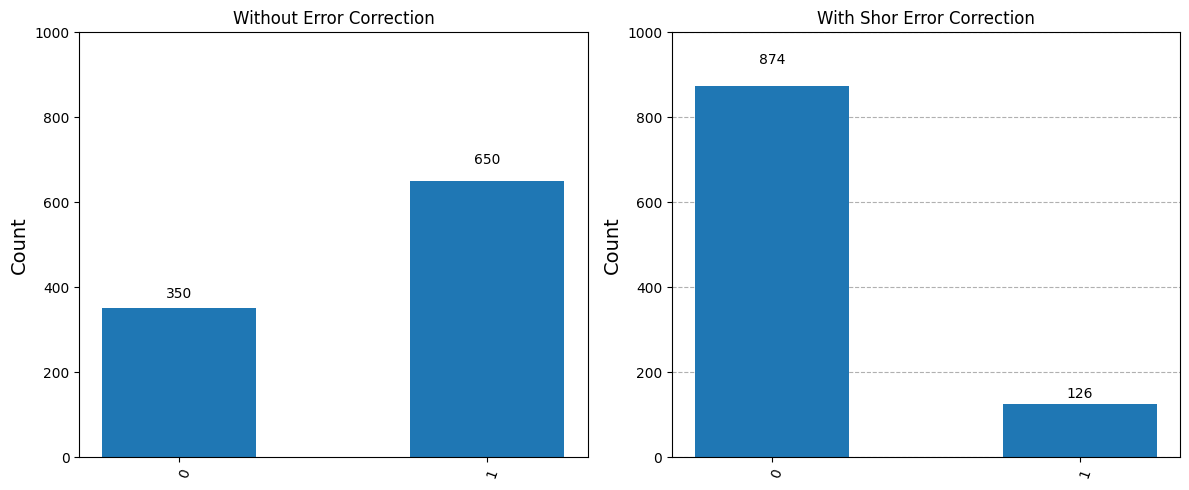


Demonstrating correction with manual error injection...
Injected error on qubit 4 → Measured: {'1': 1000}
Success rate: 100.0% (should be 100%)

Circuit depth: 18
Number of gates: 40
Circuit width (qubits): 9

Shor Encoding Circuit:
               ┌───┐          
q_0: ──■────■──┤ H ├──■────■──
       │    │  └───┘┌─┴─┐  │  
q_1: ──┼────┼───────┤ X ├──┼──
       │    │       └───┘┌─┴─┐
q_2: ──┼────┼────────────┤ X ├
     ┌─┴─┐  │  ┌───┐     └───┘
q_3: ┤ X ├──┼──┤ H ├──■────■──
     └───┘  │  └───┘┌─┴─┐  │  
q_4: ───────┼───────┤ X ├──┼──
            │       └───┘┌─┴─┐
q_5: ───────┼────────────┤ X ├
          ┌─┴─┐┌───┐     └───┘
q_6: ─────┤ X ├┤ H ├──■────■──
          └───┘└───┘┌─┴─┐  │  
q_7: ───────────────┤ X ├──┼──
                    └───┘┌─┴─┐
q_8: ────────────────────┤ X ├
                         └───┘

Simplified QEC Circuit:
     ┌───┐          ┌───┐                    ┌───┐          ┌─┐
q_0: ┤ H ├──■────■──┤ H ├──■────■────■────■──┤ H ├──■────■──┤M├
     └───┘  │    │  └───

In [ ]:
#4/9/2025

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Shor encoding circuit
# -----------------------------
def shor_encode():
    qc = QuantumCircuit(9, name="ShorEncode")
    # Bit-flip encoding
    qc.cx(0, 3)
    qc.cx(0, 6)
    # Phase-flip encoding
    qc.h(0)
    qc.h(3)
    qc.h(6)
    qc.cx(0, 1)
    qc.cx(0, 2)
    qc.cx(3, 4)
    qc.cx(3, 5)
    qc.cx(6, 7)
    qc.cx(6, 8)
    return qc

# -----------------------------
# Step 2: Apply quantum operations
# -----------------------------
def apply_quantum_operations():
    qc = QuantumCircuit(9, name="QuantumOperations")
    qc.h(0)
    qc.rx(0.5, 1)
    qc.ry(0.3, 2)
    qc.rz(0.7, 3)
    qc.s(4)
    qc.sdg(5)
    qc.t(6)
    qc.tdg(7)
    qc.x(8)
    qc.cx(0, 4)
    qc.cz(1, 5)
    qc.swap(2, 6)
    return qc

# -----------------------------
# Step 3: Apply error correction (simplified)
# -----------------------------
def apply_error_correction(syndrome_bits="000000"):
    qc = QuantumCircuit(9, name="ErrorCorrection")
    qc.barrier()
    # Placeholder logic — apply X and Z corrections to qubit 0
    qc.x(0)
    qc.z(0)
    qc.x(0)
    qc.z(0)
    return qc

# -----------------------------
# Step 4: Build full Shor QEC circuit
# -----------------------------
def shor_qec_circuit():
    qc = QuantumCircuit(9, 1)
    qc.h(0)  # Prepare |+>
    qc = qc.compose(apply_quantum_operations())
    qc = qc.compose(shor_encode())
    qc.barrier()
    qc.barrier()
    syndrome_pattern = "000000"
    qc = qc.compose(apply_error_correction(syndrome_pattern))
    qc = qc.compose(shor_encode().inverse())  # Decode
    qc.measure(0, 0)
    return qc

# -----------------------------
# Step 5: Noise model setup
# -----------------------------
noise_model = NoiseModel()
p1 = 0.01  # 1-qubit gate depolarizing prob
p2 = 0.03  # 2-qubit gate depolarizing prob

error1 = depolarizing_error(p1, 1)
noise_model.add_all_qubit_quantum_error(
    error1, ['h', 'x', 'y', 'z', 's', 'sdg', 't', 'tdg', 'rx', 'ry', 'rz']
)

error2 = depolarizing_error(p2, 2)
noise_model.add_all_qubit_quantum_error(error2, ['cx', 'cz', 'swap'])

# -----------------------------
# Step 6: Compare with and without QEC
# -----------------------------
def run_comparison():
    backend = AerSimulator(noise_model=noise_model)

    # Without QEC
    qc_no_ec = QuantumCircuit(1, 1)
    qc_no_ec.h(0)
    qc_no_ec.rx(0.5, 0)
    qc_no_ec.ry(0.3, 0)
    qc_no_ec.rz(0.7, 0)
    qc_no_ec.measure(0, 0)

    # With QEC
    qc_with_ec = shor_qec_circuit()

    # Transpile and run
    transpiled_no_ec = transpile(qc_no_ec, backend)
    transpiled_with_ec = transpile(qc_with_ec, backend)

    print("Running simulation without error correction...")
    result_no_ec = backend.run(transpiled_no_ec, shots=1000).result()
    counts_no_ec = result_no_ec.get_counts()

    print("Running simulation with Shor error correction...")
    result_with_ec = backend.run(transpiled_with_ec, shots=1000).result()
    counts_with_ec = result_with_ec.get_counts()

    # Calculate statistics
    prob_0_no_ec = counts_no_ec.get('0', 0) / 1000
    prob_0_with_ec = counts_with_ec.get('0', 0) / 1000

    print(f"\nResults:")
    print(f"Without EC: 0={prob_0_no_ec:.3f}, 1={1 - prob_0_no_ec:.3f}")
    print(f"With EC:    0={prob_0_with_ec:.3f}, 1={1 - prob_0_with_ec:.3f}")

    deviation_no_ec = abs(0.5 - prob_0_no_ec) * 200
    deviation_with_ec = abs(0.5 - prob_0_with_ec) * 200

    print(f"Deviation from 50/50 without EC: {deviation_no_ec:.2f}%")
    print(f"Deviation from 50/50 with EC: {deviation_with_ec:.2f}%")

    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    plot_histogram(counts_no_ec, ax=ax1)
    ax1.set_title('Without Error Correction')
    ax1.set_ylim(0, 1000)

    plot_histogram(counts_with_ec, ax=ax2)
    ax2.set_title('With Shor Error Correction')
    ax2.set_ylim(0, 1000)

    plt.tight_layout()
    plt.savefig('shor_code_comparison.png', dpi=300)
    plt.show()

    return counts_no_ec, counts_with_ec

# -----------------------------
# Step 7: Inject specific error and test correction
# -----------------------------
def demonstrate_error_correction():
    print("\nDemonstrating correction with manual error injection...")

    qc = QuantumCircuit(9, 1)
    qc.x(0)  # Prepare |1⟩
    qc = qc.compose(shor_encode())
    qc.x(4)  # Inject X error on qubit 4
    qc = qc.compose(shor_encode().inverse())
    qc.measure(0, 0)

    backend = AerSimulator()
    transpiled_qc = transpile(qc, backend)
    result = backend.run(transpiled_qc, shots=1000).result()
    counts = result.get_counts()

    success_rate = counts.get('1', 0) / 10  # Expect ~100%
    print(f"Injected error on qubit 4 → Measured: {counts}")
    print(f"Success rate: {success_rate:.1f}% (should be 100%)")
    return counts

# -----------------------------
# Step 8: Display circuit diagrams
# -----------------------------
def visualize_circuits():
    encode = shor_encode()
    print("\nShor Encoding Circuit:")
    print(encode.draw(output='text'))

    simple_qec = QuantumCircuit(9, 1)
    simple_qec.h(0)
    simple_qec = simple_qec.compose(shor_encode())
    simple_qec = simple_qec.compose(shor_encode().inverse())
    simple_qec.measure(0, 0)

    print("\nSimplified QEC Circuit:")
    print(simple_qec.draw(output='text'))

# -----------------------------
# Main
# -----------------------------
if __name__ == "__main__":
    counts_no_ec, counts_with_ec = run_comparison()
    error_counts = demonstrate_error_correction()

    qc = shor_qec_circuit()
    print("\nCircuit depth:", qc.depth())
    print("Number of gates:", qc.size())
    print("Circuit width (qubits):", qc.num_qubits)

    visualize_circuits()


In [ ]:
pip install qiskit qiskit-aer matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00
